# Лабораторная работа 9
# Обход бинарного дерева поиска. Поиск максимального и минимального значений

Шпак Андрей Валерьевич, 08.08.2022

## Задание 9.1 (Центрированный обход бинарного дерева поиска)

$\color{red}{Доопределите}$ $\color{red}{или}$ $\color{red}{переопределите}$ классы <code>BinaryTree</code>, <code>BinaryNode</code>, <code>EmptyNode</code> из Лабораторной работы 8 за счет определения нового метода <code>lcr(self)</code>, реализующего центрированный обход бинарного дерева поиска. Рекомендации по выполнению представлены в лекции к теме $\textit{Бинарное дерево поиска. Реализация на основе ООП}$.

Результатом вызова метода <code>lcr</code> для экземпляра класса <code>BinaryTree</code> должен быть список значений вершин дерева, отсортированных по возрастанию.

$\color{red}{Создайте}$ список source_data из $10^3$ случайных чисел, равномерно распределенных на отрезке $\left[ 0, 100 \right]$. $\color{red}{Постройте}$ бинарное дерево поиска по списку случайных чисел и $\color{red}{Выполнитк}$ центрированный обход дерева с помощью метода <code>lcr</code>.

$\color{red}{Постройте}$ график по точкам, ординаты которых заданы списком <code>source_data</code>. В этой же графической области $\color{red}{изобразите}$ график по точкам, одинаты которых заданы списком, результатом центрированного обхода бинарного дерева поиска.

### Выполнение Задания 9.1

In [1]:
# метод lcr класса BinaryTree вызывает метод lcr для корневой вершины

class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()
    
    def __repr__(self):
        return repr(self.root)
    
    def insert(self, value):
        self.root = self.root.insert(value)
        
    def __contains__(self, value):
        return value in self.root
    
    def __len__(self):
        return len(self.root)
    
    def lcr(self):
        return self.root.lcr()

In [2]:
# метод lcr класса EmptyNode возвращает пустой список

class EmptyNode:
    def __repr__(self):
        return "*"
    
    def insert(self, value):
        return BinaryNode(self, value, self)
    
    def __contains__(self, value):
        return False
    
    def __len__(self):
        return 0
    
    def lcr(self):
        return []

In [3]:
class BinaryNode():
    
    count = 0
    
    def __init__(self, left, value, right): 
        self.left = left
        self.value = value
        self.right = right
        BinaryNode.count += 1
        
    def __repr__(self): 
        return "(%s, %s, %s)" % (repr(self.left), repr(self.value), repr(self.right))
    
    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self
    
    def __contains__(self, value):
        if value == self.value:
            return True
        elif value < self.value:
            return value in self.left
        else:
            return value in self.right
        
    def __len__(self):
        return self.count
    
    def lcr(self):
        result = []
        result += self.left.lcr() + [self.value]
        result += self.right.lcr()
        return result

In [4]:
import matplotlib.pyplot as plt

In [5]:
import random as rnd

Cоздадим список из $10^3$ случайных чисел, равномерно распределенных на отрезке $\left[ 0, 100 \right]$ с помощью функции <code>uniform</code> из модуля <code>random</code>

In [6]:
source_data = [rnd.uniform(0, 100) for _ in range(10 ** 3)]

Построим бинарное дерево поиска на основе списка <code>source_data</code>

In [33]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

Вызовем метод <code>lcr</code> для экземпляра <code>tree</code>

In [8]:
sorted_data = tree.lcr()

In [10]:
sorted_data;

# ура, получилось с первого раза

Для проверки корректности обхода изобразим в одной графической области значения исходного списка и результирующего списка после обхода дерева

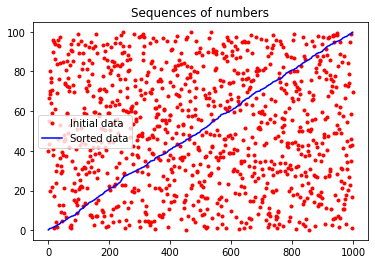

In [20]:
plt.plot(source_data, 'r.', label='Initial data')
plt.plot(sorted_data, color='blue', label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 9.2 (Нахождение минимального и максимального значения)

$\color{red}{Доопределите}$ $\color{red}{или}$ $\color{red}{переопределите}$ классы <code>BinaryTree</code>, <code>BinaryNode</code>, <code>EmptyNode</code> за счет определения метода <code>min(self)</code> и <code>max(self)</code> для нахождения минимального и максимального значений в дереве, соответственно. Рекомендации по выполнению представлены в лекции к теме $\textit{Бинарное дерево поиска. Реализация на основе ООП}$.

$\color{red}{Протестируйте}$ корректность выполнения методов <code>min</code> и <code>max</code> для ранее созданного дерева <code>tree</code>.

In [22]:
# ВОПРОС: в чем разница между доопределить и переопределить

## Задание 9.3 (Создание модуля)

$\color{red}{Напишите}$ модуль <code>binaryTree.py</code> на основе созданных классов.

$\color{red}{Напишите}$ строки документации для классов <code>BinaryTree</code>, <code>BinaryNode</code>, <code>EmptyNode</code> и для каждого метода классов.

$\color{red}{Протестируйте}$ работу созданного модуля на примерах.

In [29]:
# метод min класса BinaryTree вызывает метод min для корневой вершины

class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()
    
    def __repr__(self):
        return repr(self.root)
    
    def insert(self, value):
        self.root = self.root.insert(value)
        
    def __contains__(self, value):
        return value in self.root
    
    def __len__(self):
        return len(self.root)
    
    def lcr(self):
        return self.root.lcr()
    
    def min(self):
        return self.root.min()

In [30]:
# метод min класса EmptyNode возвращает None

class EmptyNode:
    def __repr__(self):
        return "*"
    
    def insert(self, value):
        return BinaryNode(self, value, self)
    
    def __contains__(self, value):
        return False
    
    def __len__(self):
        return 0
    
    def lcr(self):
        return []
    
    def min(self):
        return None

In [31]:
# метод min класса BinaryNode анализирует только левое поддерево для экземпляра класса BinaryNode

class BinaryNode():
    
    count = 0
    
    def __init__(self, left, value, right): 
        self.left = left
        self.value = value
        self.right = right
        BinaryNode.count += 1
        
    def __repr__(self): 
        return "(%s, %s, %s)" % (repr(self.left), repr(self.value), repr(self.right))
    
    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self
    
    def __contains__(self, value):
        if value == self.value:
            return True
        elif value < self.value:
            return value in self.left
        else:
            return value in self.right
        
    def __len__(self):
        return self.count
    
    def lcr(self):
        result = []
        result += self.left.lcr() + [self.value]
        result += self.right.lcr()
        return result
    
    def min(self):
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.left.min()

In [35]:
tree.min(), tree.min() == sorted_data[0]

(0.1434064409822744, True)